#**PROYECTO ARTIFICIAL INTELLIGENCE I 2024-2**

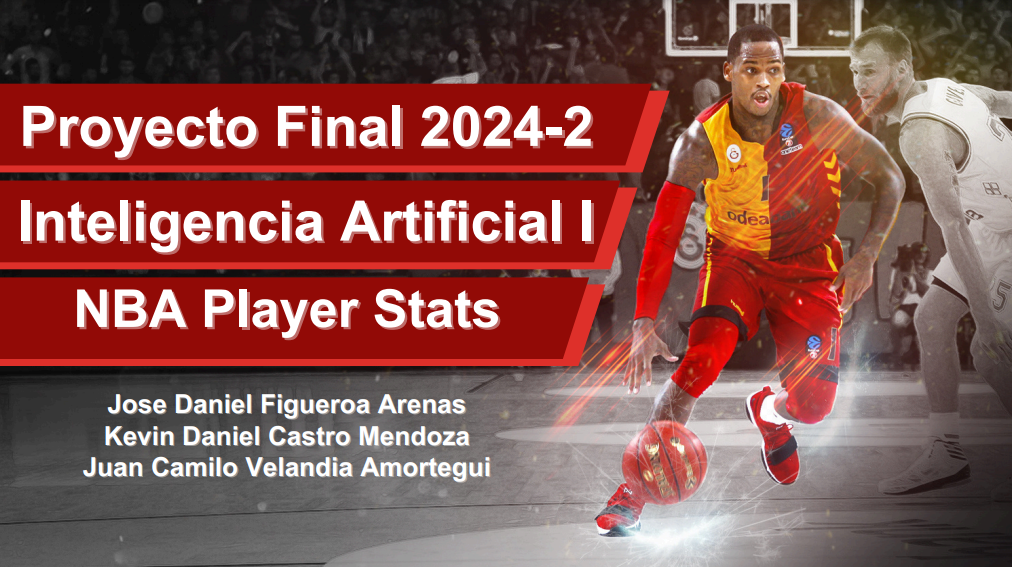

**MONTAR EL DRIVE**

In [ ]:
import os
from google.colab import drive

path_ai = "Artificial_Intelligence_I/Proyecto de Clase" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Artificial_Intelligence_I/Proyecto de Clase


In [ ]:
import os
from google.colab import drive

path_ai = "/Bivlab" #@param {type:"string"}
path = "/content/drive/My Drive" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bivlab


**IMPORTACION DE LIBRERIAS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

**CARGAR DATASET**

In [ ]:
NBAStats_1 = pd.read_csv('2021-2022 NBA Player Stats.csv',sep =";", encoding='latin-1')
NBAStats_2 = pd.read_csv('2022-2023 NBA Player Stats.csv',sep =";", encoding='latin-1')
NBAStats_3 = pd.read_csv('2023-2024 NBA Player Stats.csv',sep =";", encoding='latin-1')

data = pd.concat([NBAStats_1, NBAStats_2, NBAStats_3], ignore_index=True)
print(data.head())

   Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1   Precious Achiuwa   C   22  TOR  73  28  23.6  3.6   8.3  ...  0.595   
1   2       Steven Adams   C   28  MEM  76  75  26.3  2.8   5.1  ...  0.543   
2   3        Bam Adebayo   C   24  MIA  56  56  32.6  7.3  13.0  ...  0.753   
3   4       Santi Aldama  PF   21  MEM  32   0  11.3  1.7   4.1  ...  0.625   
4   5  LaMarcus Aldridge   C   36  BRK  47  12  22.3  5.4   9.7  ...  0.873   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  
1  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  
2  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  
3  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  
4  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  

[5 rows x 30 columns]


**ENCABEZADOS DEL DATASET**

In [ ]:
print(data.shape)
data.head()

(2226, 30)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


**INFORMACION DEL DATASET**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      2226 non-null   int64  
 1   Player  2226 non-null   object 
 2   Pos     2226 non-null   object 
 3   Age     2226 non-null   int64  
 4   Tm      2226 non-null   object 
 5   G       2226 non-null   int64  
 6   GS      2226 non-null   int64  
 7   MP      2226 non-null   float64
 8   FG      2226 non-null   float64
 9   FGA     2226 non-null   float64
 10  FG%     2226 non-null   float64
 11  3P      2226 non-null   float64
 12  3PA     2226 non-null   float64
 13  3P%     2226 non-null   float64
 14  2P      2226 non-null   float64
 15  2PA     2226 non-null   float64
 16  2P%     2226 non-null   float64
 17  eFG%    2226 non-null   float64
 18  FT      2226 non-null   float64
 19  FTA     2226 non-null   float64
 20  FT%     2226 non-null   float64
 21  ORB     2226 non-null   float64
 22  

#**PRIMERA ENTREGA - PROYECTO FINAL (ARTIFICIAL INTELLIGENCE I 2024-2)**

**1. HISTOGRAMAS**

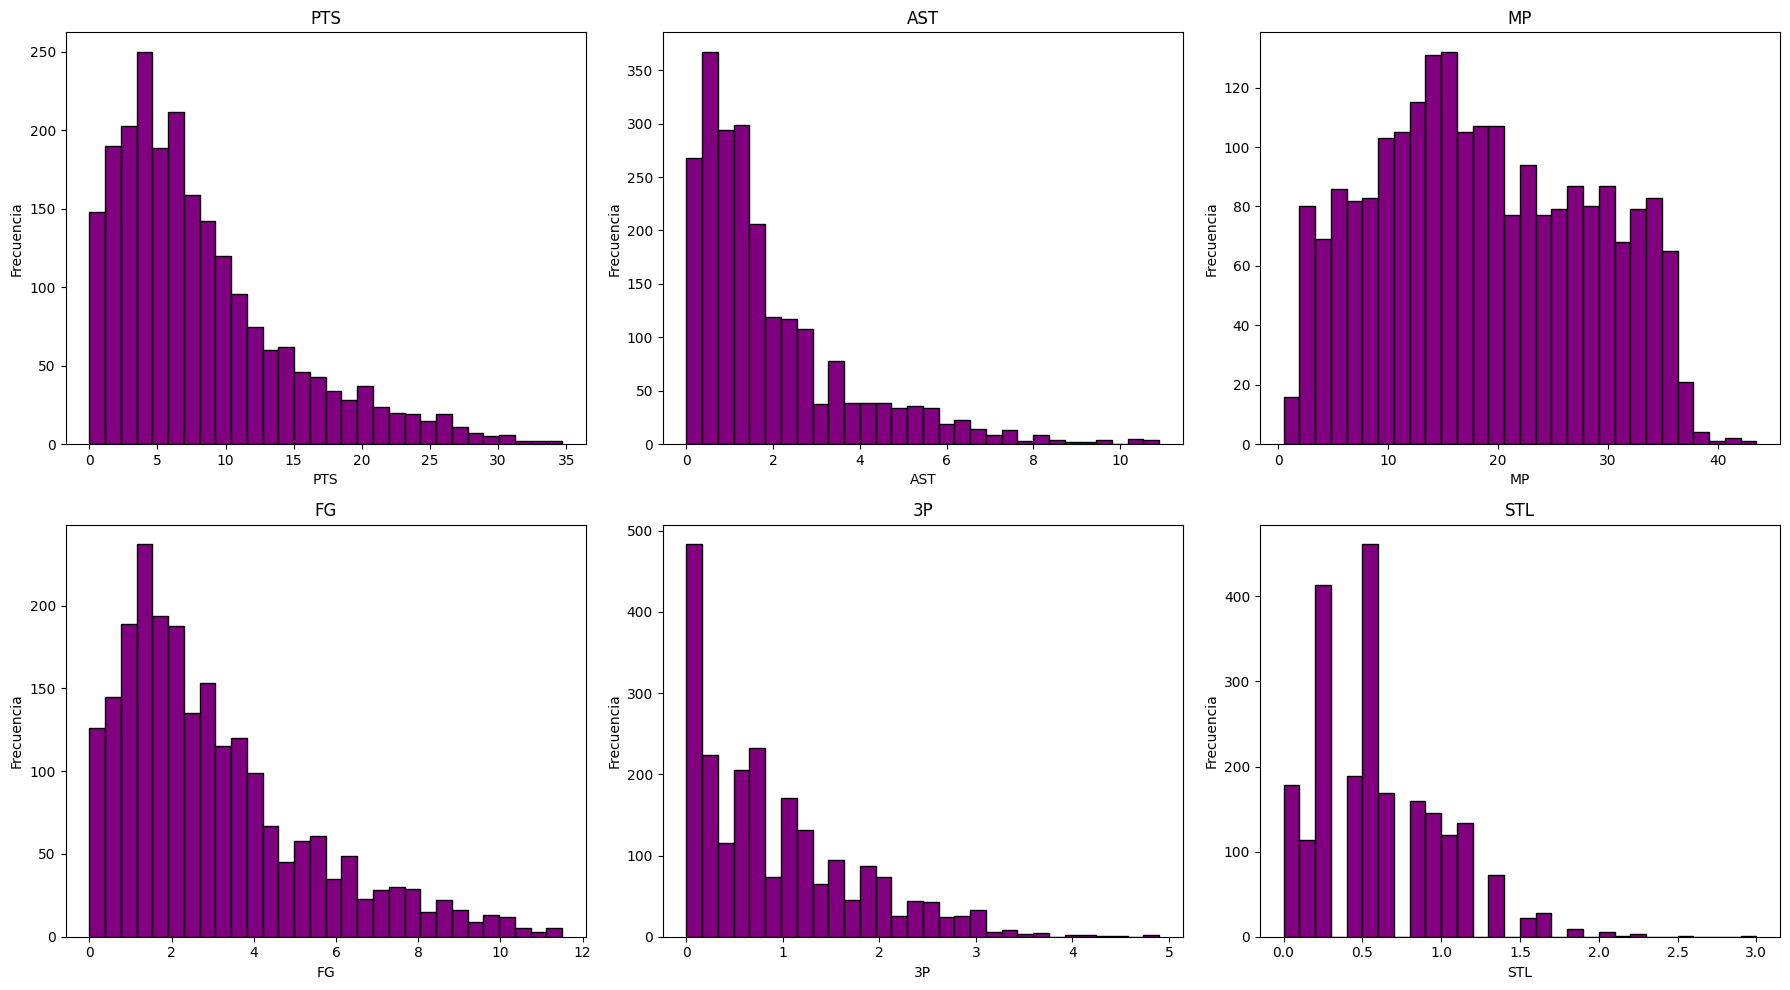

In [ ]:
# Lista de columnas seleccionadas para crear histogramas
columns_to_plot = ['PTS', 'AST', 'MP', 'FG', '3P', 'STL']

# Configuración del tamaño de la figura
plt.figure(figsize=(18, 10))

# Crear histogramas para cada variable seleccionada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[column].dropna(), bins=30, color='purple', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

**2. MATRIZ DE CORRELACION**

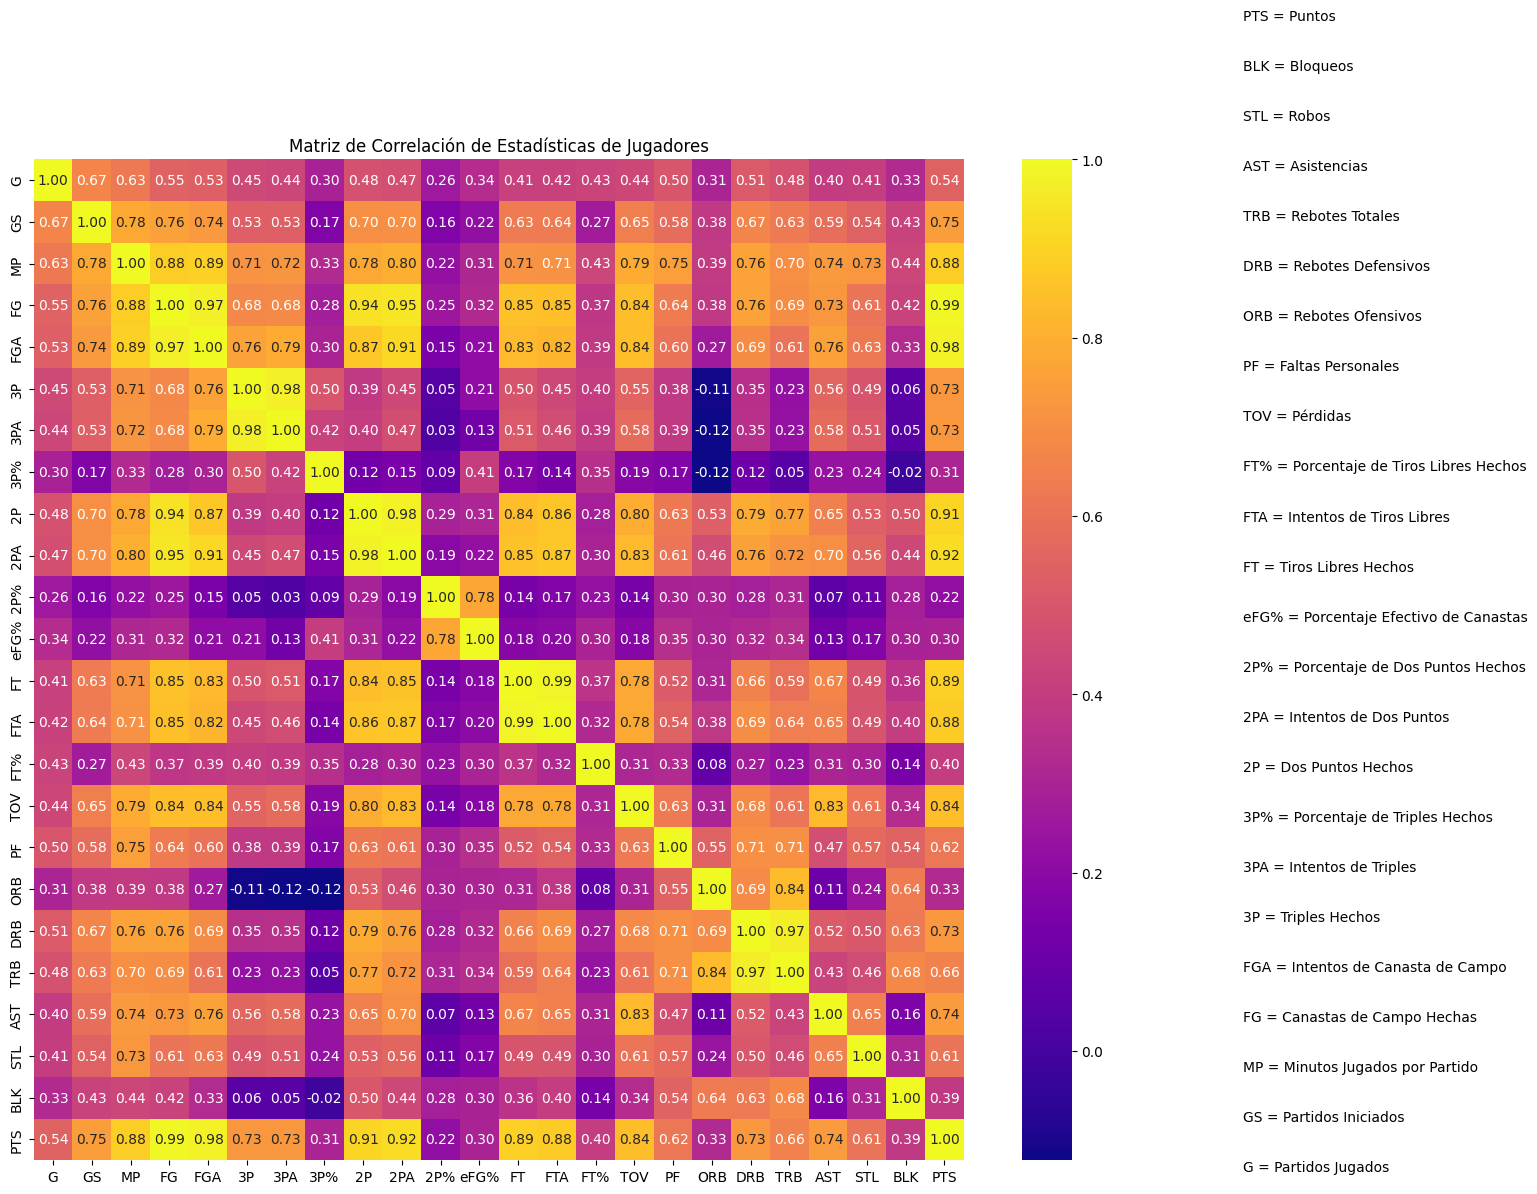

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data[['G','GS','MP', 'FG', 'FGA', '3P', '3PA','3P%','2P','2PA','2P%',
                           'eFG%', 'FT', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'TRB',
                           'AST', 'STL', 'BLK', 'PTS']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma')

# Añadir etiquetas al lado derecho
labels = {
    'G': 'G = Partidos Jugados',
    'GS': 'GS = Partidos Iniciados',
    'MP': 'MP = Minutos Jugados por Partido',
    'FG': 'FG = Canastas de Campo Hechas',
    'FGA': 'FGA = Intentos de Canasta de Campo',
    '3P': '3P = Triples Hechos',
    '3PA': '3PA = Intentos de Triples',
    '3P%': '3P% = Porcentaje de Triples Hechos',
    '2P': '2P = Dos Puntos Hechos',
    '2PA': '2PA = Intentos de Dos Puntos',
    '2P%': '2P% = Porcentaje de Dos Puntos Hechos',
    'eFG%': 'eFG% = Porcentaje Efectivo de Canastas',
    'FT': 'FT = Tiros Libres Hechos',
    'FTA': 'FTA = Intentos de Tiros Libres',
    'FT%': 'FT% = Porcentaje de Tiros Libres Hechos',
    'TOV': 'TOV = Pérdidas',
    'PF': 'PF = Faltas Personales',
    'ORB': 'ORB = Rebotes Ofensivos',
    'DRB': 'DRB = Rebotes Defensivos',
    'TRB': 'TRB = Rebotes Totales',
    'AST': 'AST = Asistencias',
    'STL': 'STL = Robos',
    'BLK': 'BLK = Bloqueos',
    'PTS': 'PTS = Puntos'
}
# Crear una lista de posiciones y ajustar la separación
y_positions = [0.05 * i for i in range(len(labels))]  # Ajustar la separación aquí

# Colocar las etiquetas al lado derecho
for i, (key, value) in enumerate(labels.items()):
    plt.text(1.3, y_positions[i], value, ha='left', va='top', fontsize=10, transform=plt.gca().transAxes)

plt.title('Matriz de Correlación de Estadísticas de Jugadores')
plt.show()



**3. GRAFICO DE DISPERSION**

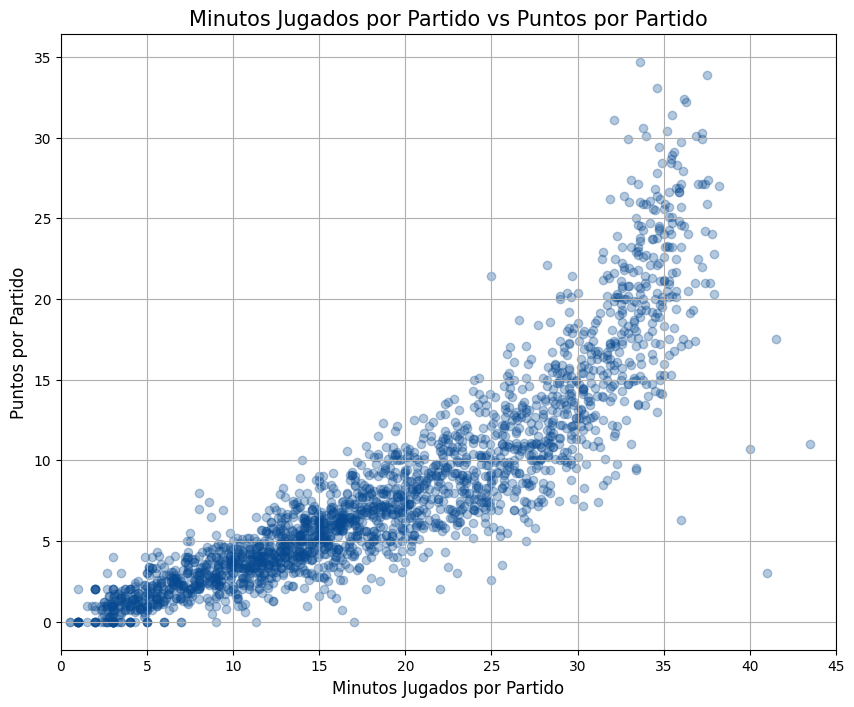

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10,8))
plt.scatter(data['MP'], data['PTS'], color=plt.cm.Blues(0.9), alpha=0.3)

# Etiquetas y límites
plt.title("Minutos Jugados por Partido vs Puntos por Partido", fontsize=15)
plt.xlabel("Minutos Jugados por Partido", fontsize=12)
plt.ylabel("Puntos por Partido", fontsize=12)
plt.xlim(0, 45)
plt.grid(True)

# Mostrar gráfico
plt.show()

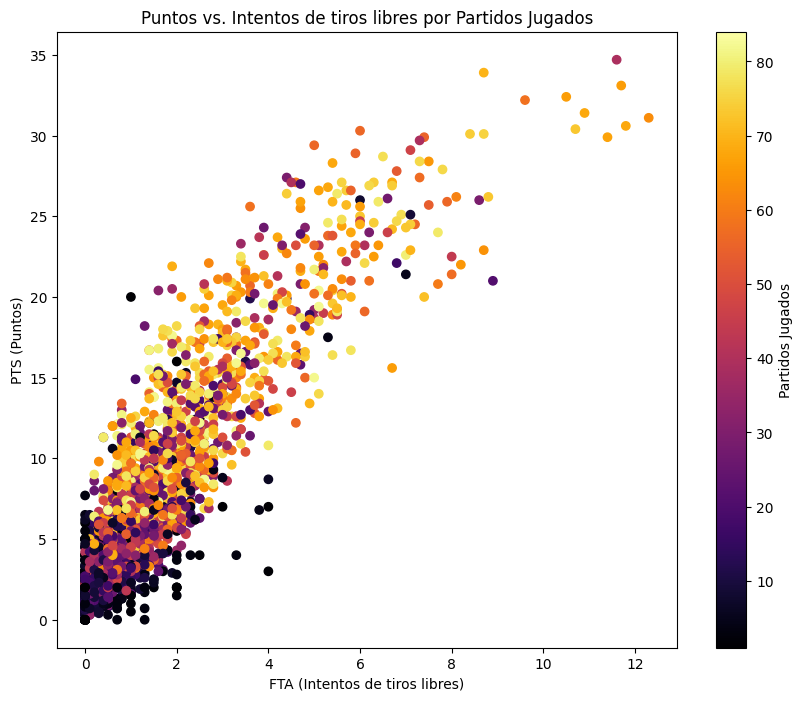

In [ ]:
plt.figure(figsize=(10,8))  # Adjust figure size as needed
plt.scatter(data['FTA'], data['PTS'], c=data['G'], cmap='inferno')

# Customize the plot
plt.title('Puntos vs. Intentos de tiros libres por Partidos Jugados')
plt.xlabel('FTA (Intentos de tiros libres)')
plt.ylabel('PTS (Puntos)')
plt.colorbar(label='Partidos Jugados')

# Show the plot
plt.show()

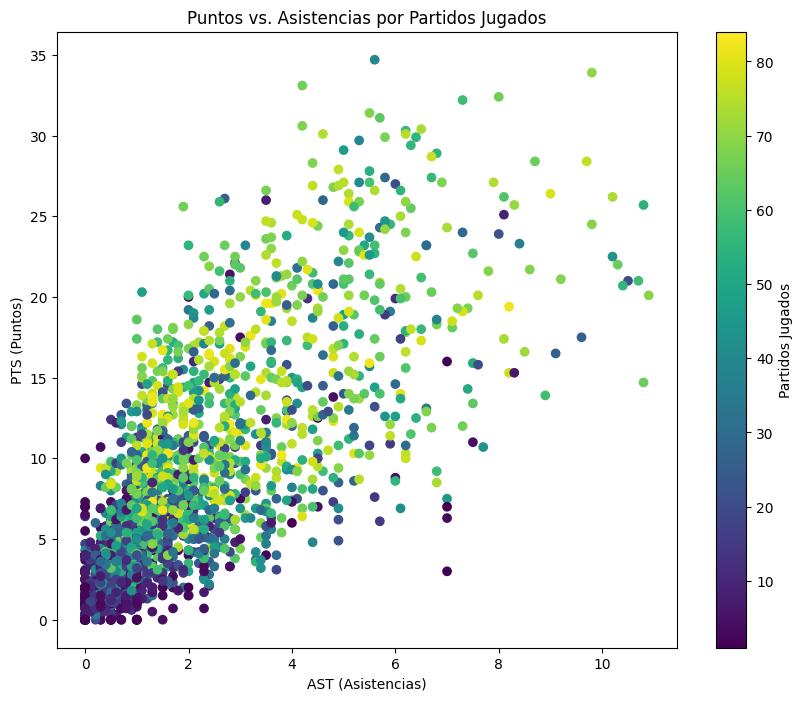

In [ ]:
plt.figure(figsize=(10,8))  # Adjust figure size as needed
plt.scatter(data['AST'], data['PTS'], c=data['G'], cmap='viridis')

# Customize the plot
plt.title('Puntos vs. Asistencias por Partidos Jugados')
plt.xlabel('AST (Asistencias)')
plt.ylabel('PTS (Puntos)')
plt.colorbar(label='Partidos Jugados')

# Show the plot
plt.show()

#**SEGUNDA ENTREGA - PROYECTO FINAL (ARTIFICIAL INTELLIGENCE I 2024-2)**

**METODOS DE CLASIFICACION**

In [ ]:
#@title *- Preprocesamiento* : Solo ejecutar una vez, despues de ejecutada, no volver a ejecutar { display-mode: "form" }

# Aplicar OneHotEncoder a la columna categórica 'Tm' y 'Player' usando pd.get_dummies
data = pd.get_dummies(data, columns=['Tm', 'Player'])

# Contar el número de ejemplos por clase
class_counts = data['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(to_remove)
data = data[~data['Pos'].isin(to_remove)]

Index(['SF-SG', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG', 'C-PF', 'SF-PF', 'PF-C'], dtype='object', name='Pos')


**1. DECISION TREE: CLASSIFIER**

Mejor configuración: max_depth=10, criterio=entropy
              precision    recall  f1-score   support

           C       0.62      0.75      0.68        73
          PF       0.49      0.45      0.47        82
          PG       0.52      0.63      0.57        76
          SF       0.48      0.51      0.49        93
          SG       0.53      0.39      0.45       114

    accuracy                           0.53       438
   macro avg       0.53      0.55      0.53       438
weighted avg       0.52      0.53      0.52       438



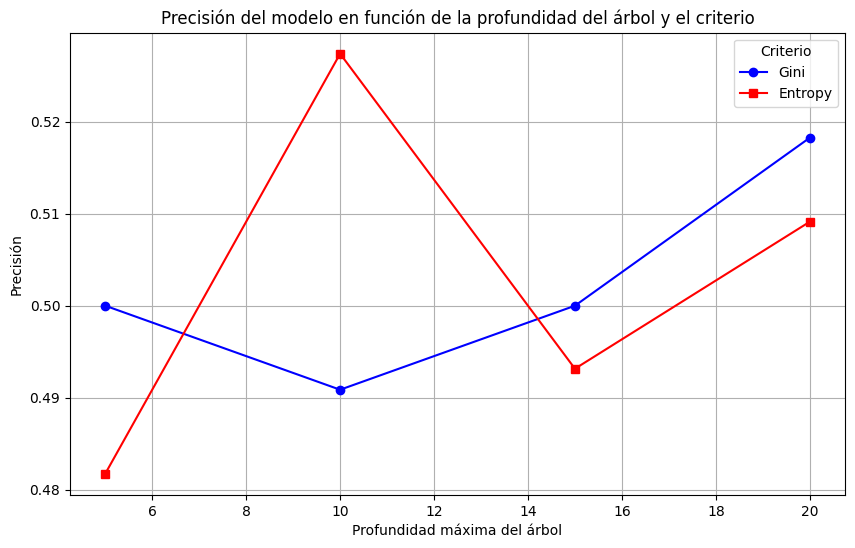

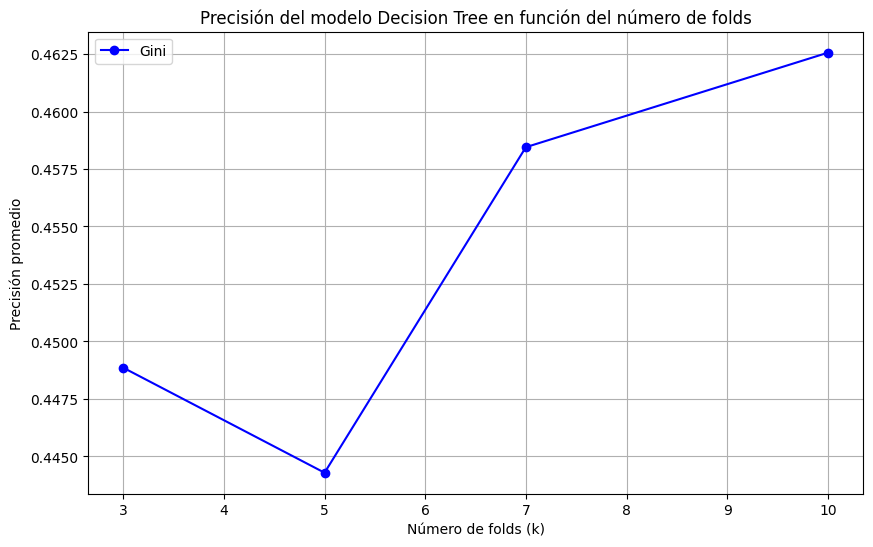

In [ ]:
def decision_tree_classifier(data, max_depth, criterion):
    """
    Entrena un clasificador de árbol de decisión y retorna el modelo, precisión y datos de prueba.
    """
    X = data.drop(columns=['Pos'])
    y = data['Pos']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    classifier = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=21)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, classification_report(y_test, y_pred, output_dict=True), classification_report(y_test, y_pred)

max_depth_values = [5, 10, 15, 20]
accuracies_gini = []
accuracies_entropy = []

best_accuracy = 0
best_depth = 0
best_criterion = ''
best_report = ''

for depth in max_depth_values:
    accuracy_gini, report_gini_dict, report_gini = decision_tree_classifier(data, max_depth=depth, criterion='gini')
    accuracies_gini.append(accuracy_gini)

    if accuracy_gini > best_accuracy:
        best_accuracy = accuracy_gini
        best_depth = depth
        best_criterion = 'gini'
        best_report = report_gini

    accuracy_entropy, report_entropy_dict, report_entropy = decision_tree_classifier(data, max_depth=depth, criterion='entropy')
    accuracies_entropy.append(accuracy_entropy)

    if accuracy_entropy > best_accuracy:
        best_accuracy = accuracy_entropy
        best_depth = depth
        best_criterion = 'entropy'
        best_report = report_entropy

print(f"Mejor configuración: max_depth={best_depth}, criterio={best_criterion}")
print(best_report)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracies_gini, marker='o', color='b', label='Gini')
plt.plot(max_depth_values, accuracies_entropy, marker='s', color='r', label='Entropy')

plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión')
plt.title('Precisión del modelo en función de la profundidad del árbol y el criterio')
plt.legend(title='Criterio', loc='best')
plt.grid(True)
plt.show()



def decision_tree_cross_validation(data, folds):
    X = data.drop(columns=['Pos'])
    y = data['Pos']

    # Clasificador con parámetros fijos
    classifier = DecisionTreeClassifier(random_state=21)

    # Validación cruzada
    scores = cross_val_score(classifier, X, y, cv=folds, scoring='accuracy')
    mean_accuracy = scores.mean()

    return mean_accuracy

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
accuracies = []

# Ejecutar el modelo para diferentes números de folds
for folds in fold_values:
    accuracy = decision_tree_cross_validation(data, folds=folds)
    accuracies.append(accuracy)

# Graficar los resultados con líneas
plt.figure(figsize=(10, 6))
plt.plot(fold_values, accuracies, marker='o', color='b', label='Gini')

plt.xlabel('Número de folds (k)')
plt.ylabel('Precisión promedio')
plt.title('Precisión del modelo Decision Tree en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()



**2. DECISION TREE: REGRESSOR**

Mejor configuración: max_depth=5, criterio=squared_error
Mejor MSE: 1.3612, Mejor R²: 0.3399


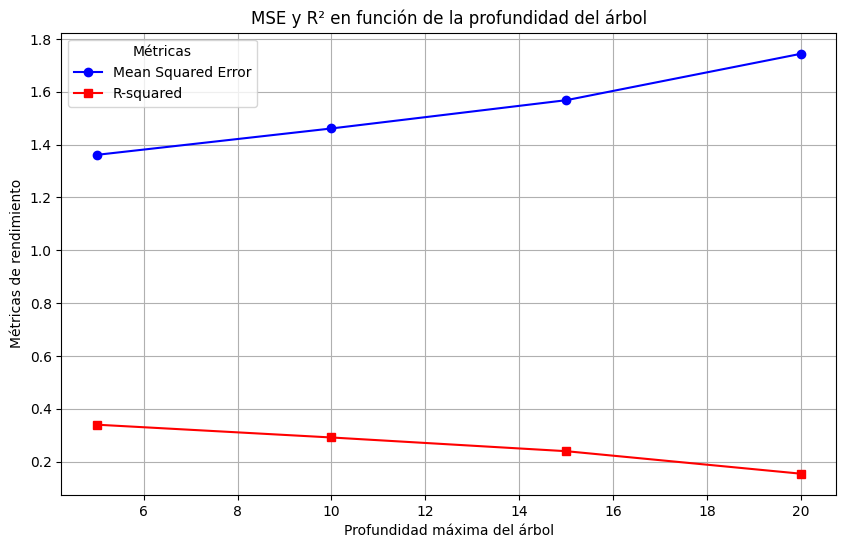

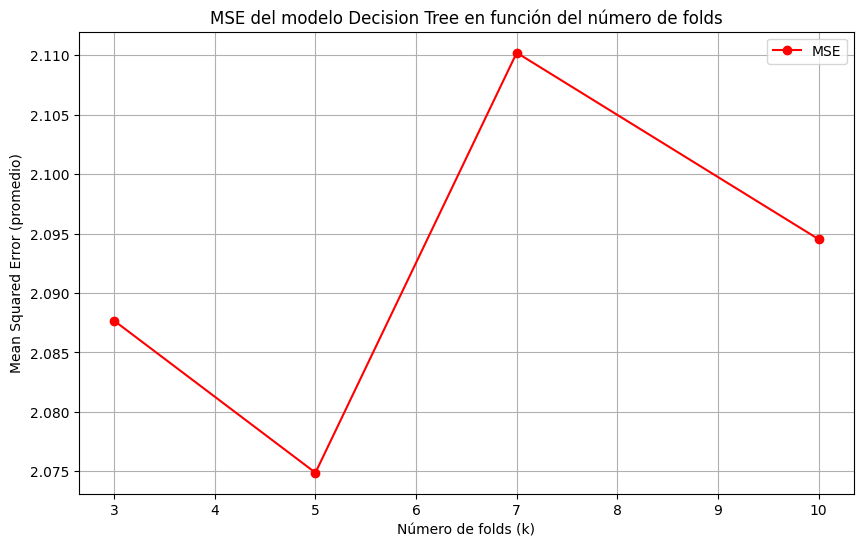

In [ ]:
def decision_tree_regressor(data, max_depth, criterion):
    """
    Entrena un regresor de árbol de decisión y retorna el modelo, MSE y R-squared.
    """
    # Primero, debemos aplicar Label Encoding a la columna 'Pos' para convertirla en valores numéricos

    label_encoder = LabelEncoder()
    data['Pos'] = label_encoder.fit_transform(data['Pos'])

    X = data.drop('Pos', axis=1)
    y = data['Pos']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    regressor = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion, random_state=21)
    regressor.fit(x_train, y_train)

    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

# Valores de profundidad máxima
max_depth_values = [5, 10, 15, 20]
mses = []
r2_scores = []

best_r2 = -np.inf  # Inicializamos con el valor más bajo posible para R²
best_depth = 0
best_criterion = ''
best_mse = None

for depth in max_depth_values:
    mse, r2 = decision_tree_regressor(data, max_depth=depth, criterion='squared_error')
    mses.append(mse)
    r2_scores.append(r2)

    if r2 > best_r2:
        best_r2 = r2
        best_depth = depth
        best_criterion = 'squared_error'
        best_mse = mse

print(f"Mejor configuración: max_depth={best_depth}, criterio={best_criterion}")
print(f"Mejor MSE: {best_mse:.4f}, Mejor R²: {best_r2:.4f}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mses, marker='o', color='b', label='Mean Squared Error')
plt.plot(max_depth_values, r2_scores, marker='s', color='r', label='R-squared')

plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Métricas de rendimiento')
plt.title('MSE y R² en función de la profundidad del árbol')
plt.legend(title='Métricas', loc='best')
plt.grid(True)
plt.show()



def decision_tree_cross_validation(data, folds):
    """
    Aplica validación cruzada con un Decision Tree Regressor y retorna el MSE promedio.
    """
    X = data.drop(columns=['Pos'])  # Reemplaza 'target' con tu columna objetivo
    y = data['Pos']

    # Regresor con parámetros fijos
    regressor = DecisionTreeRegressor(random_state=21)

    # Validación cruzada con Mean Squared Error (negativo para consistencia con métricas de error)
    scores = cross_val_score(regressor, X, y, cv=folds, scoring='neg_mean_squared_error')

    # Convertir a valores positivos y calcular el MSE promedio
    mean_mse = -scores.mean()
    return mean_mse

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
mean_mse_values = []

# Ejecutar el modelo para diferentes números de folds
for folds in fold_values:
    mean_mse = decision_tree_cross_validation(data, folds=folds)
    mean_mse_values.append(mean_mse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(fold_values, mean_mse_values, marker='o', color='r', label='MSE')

plt.xlabel('Número de folds (k)')
plt.ylabel('Mean Squared Error (promedio)')
plt.title('MSE del modelo Decision Tree en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**3. RANDOM FOREST: CLASSIFIER**

Mejor configuración: n_estimators=100, criterio=gini
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        73
           1       0.65      0.49      0.56        82
           2       0.67      0.79      0.72        76
           3       0.60      0.53      0.56        93
           4       0.59      0.66      0.62       114

    accuracy                           0.64       438
   macro avg       0.65      0.65      0.64       438
weighted avg       0.64      0.64      0.64       438



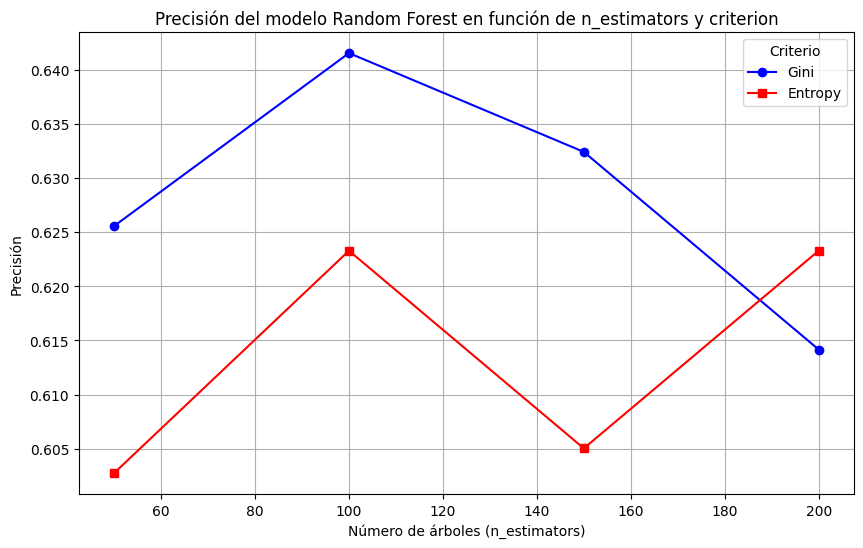

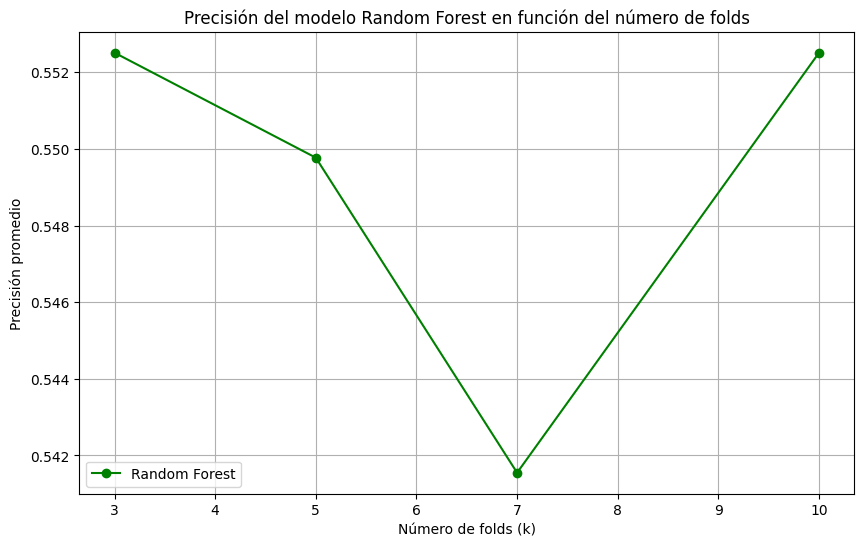

In [ ]:
def random_forest_classifier(data, n_estimators, criterion):
    """
    Entrena un clasificador Random Forest y retorna la precisión, reporte de clasificación y los datos de prueba.
    """
    X = data.drop(columns=['Pos'])
    y = data['Pos']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=21)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, classification_report(y_test, y_pred, output_dict=True), classification_report(y_test, y_pred)

# Lista de diferentes valores de n_estimators
n_estimators_values = [50, 100, 150, 200]
accuracies_gini = []
accuracies_entropy = []

best_accuracy = 0
best_n_estimators = 0
best_criterion = ''
best_report = ''

for n_estimators in n_estimators_values:
    accuracy_gini, report_gini_dict, report_gini = random_forest_classifier(data, n_estimators=n_estimators, criterion='gini')
    accuracies_gini.append(accuracy_gini)

    if accuracy_gini > best_accuracy:
        best_accuracy = accuracy_gini
        best_n_estimators = n_estimators
        best_criterion = 'gini'
        best_report = report_gini

    accuracy_entropy, report_entropy_dict, report_entropy = random_forest_classifier(data, n_estimators=n_estimators, criterion='entropy')
    accuracies_entropy.append(accuracy_entropy)

    if accuracy_entropy > best_accuracy:
        best_accuracy = accuracy_entropy
        best_n_estimators = n_estimators
        best_criterion = 'entropy'
        best_report = report_entropy

print(f"Mejor configuración: n_estimators={best_n_estimators}, criterio={best_criterion}")
print(best_report)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies_gini, marker='o', color='b', label='Gini')
plt.plot(n_estimators_values, accuracies_entropy, marker='s', color='r', label='Entropy')

plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo Random Forest en función de n_estimators y criterion')
plt.legend(title='Criterio', loc='best')
plt.grid(True)
plt.show()



def random_forest_cross_validation(data, folds):
    """
    Aplica validación cruzada con un Random Forest Classifier y retorna la precisión promedio.
    """
    X = data.drop(columns=['Pos'])
    y = data['Pos']

    # Clasificador Random Forest con parámetros fijos
    classifier = RandomForestClassifier(random_state=21)

    # Validación cruzada
    scores = cross_val_score(classifier, X, y, cv=folds, scoring='accuracy')
    mean_accuracy = scores.mean()

    return mean_accuracy

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
accuracies = []

# Ejecutar el modelo para diferentes números de folds
for folds in fold_values:
    accuracy = random_forest_cross_validation(data, folds=folds)
    accuracies.append(accuracy)

# Graficar los resultados con líneas
plt.figure(figsize=(10, 6))
plt.plot(fold_values, accuracies, marker='o', color='g', label='Random Forest')

plt.xlabel('Número de folds (k)')
plt.ylabel('Precisión promedio')
plt.title('Precisión del modelo Random Forest en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**4. RANDOM FOREST: REGRESSOR**

Mejor configuración: n_estimators=200, criterio=squared_error
Mejor MSE: 1.0156, Mejor R²: 0.5075


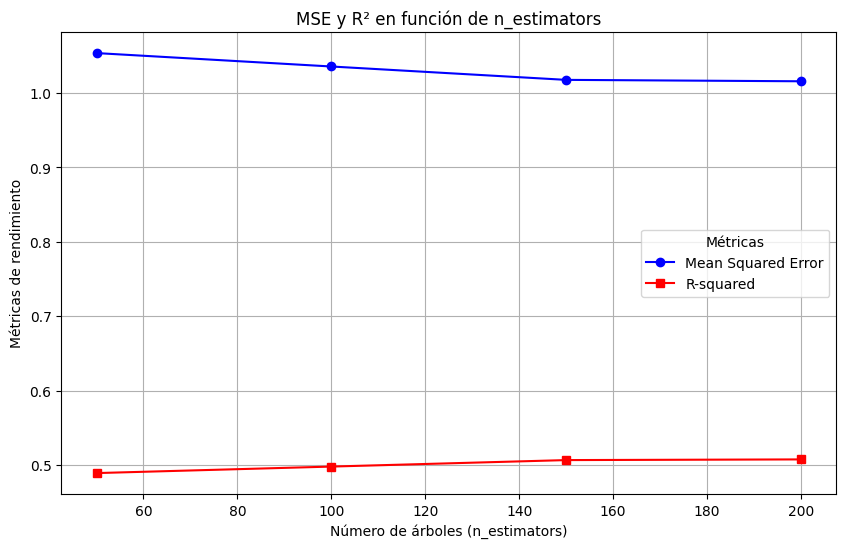

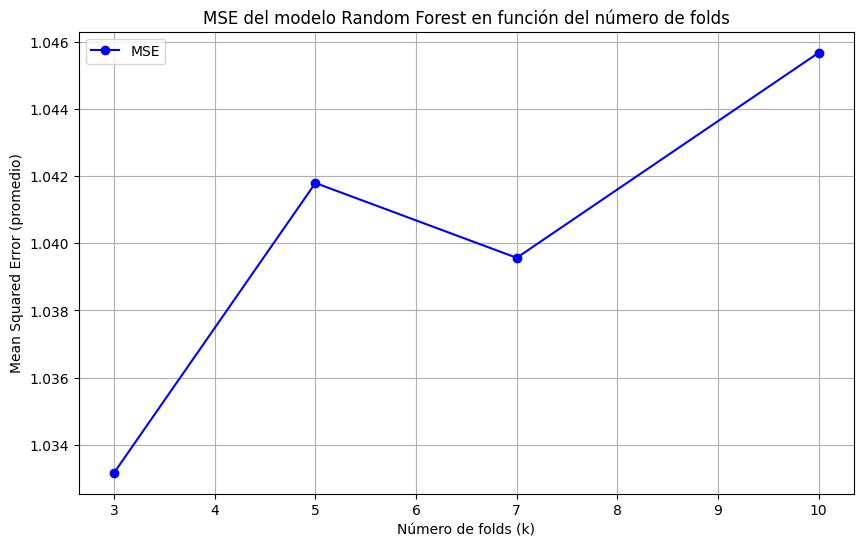

In [ ]:
def random_forest_regressor(data, n_estimators, criterion):
    """
    Entrena un regresor de Random Forest y retorna el MSE y R-squared.
    """
    # Aplicar Label Encoding a la columna 'Pos' si es necesario convertirla en valores numéricos
    label_encoder = LabelEncoder()
    data['Pos'] = label_encoder.fit_transform(data['Pos'])

    X = data.drop('Pos', axis=1)
    y = data['Pos']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    regressor = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, random_state=21)
    regressor.fit(x_train, y_train)

    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

# Valores de n_estimators
n_estimators_values = [50, 100, 150, 200]
mses = []
r2_scores = []

best_r2 = -np.inf  # Inicializamos con el valor más bajo posible para R²
best_n_estimators = 0
best_criterion = ''
best_mse = None

for n_estimators in n_estimators_values:
    mse, r2 = random_forest_regressor(data, n_estimators=n_estimators, criterion='squared_error')
    mses.append(mse)
    r2_scores.append(r2)

    if r2 > best_r2:
        best_r2 = r2
        best_n_estimators = n_estimators
        best_criterion = 'squared_error'
        best_mse = mse

print(f"Mejor configuración: n_estimators={best_n_estimators}, criterio={best_criterion}")
print(f"Mejor MSE: {best_mse:.4f}, Mejor R²: {best_r2:.4f}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mses, marker='o', color='b', label='Mean Squared Error')
plt.plot(n_estimators_values, r2_scores, marker='s', color='r', label='R-squared')

plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Métricas de rendimiento')
plt.title('MSE y R² en función de n_estimators')
plt.legend(title='Métricas', loc='best')
plt.grid(True)
plt.show()



def random_forest_cross_validation(data, folds):
    """
    Aplica validación cruzada con un Random Forest Regressor y retorna el MSE promedio.
    """
    X = data.drop(columns=['Pos'])  # Reemplaza 'Pos' con tu columna objetivo
    y = data['Pos']

    # Regresor Random Forest con parámetros fijos
    regressor = RandomForestRegressor(random_state=21)

    # Validación cruzada con Mean Squared Error (negativo para consistencia con métricas de error)
    scores = cross_val_score(regressor, X, y, cv=folds, scoring='neg_mean_squared_error')

    # Convertir a valores positivos y calcular el MSE promedio
    mean_mse = -scores.mean()
    return mean_mse

# Lista de diferentes números de folds
fold_values = [3, 5, 7, 10]
mean_mse_values = []

# Ejecutar el modelo para diferentes números de folds
for folds in fold_values:
    mean_mse = random_forest_cross_validation(data, folds=folds)
    mean_mse_values.append(mean_mse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(fold_values, mean_mse_values, marker='o', color='b', label='MSE')

plt.xlabel('Número de folds (k)')
plt.ylabel('Mean Squared Error (promedio)')
plt.title('MSE del modelo Random Forest en función del número de folds')
plt.legend(loc='best')
plt.grid(True)
plt.show()


#**TERCERA ENTREGA - PROYECTO FINAL (ARTIFICIAL INTELLIGENCE I 2024-2)**

**Deep Learning con 3 capas**



Clases a eliminar por tener menos de 10 ejemplos: ['SF-SG', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG', 'C-PF', 'SF-PF', 'PF-C']
Entrenando el modelo con 10 épocas...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1861 - loss: 1.6118
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2173 - loss: 1.6075
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2274 - loss: 1.6038
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2573 - loss: 1.5988
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2670 - loss: 1.5947
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2501 - loss: 1.5942
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2737 - loss: 1.5909
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2820 - loss: 1.5860
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2886 - loss: 1.5830
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2910 - loss: 1.5797
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entrenando el modelo con 20 épocas...
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2994 - loss: 1.5765
Epoch 2/2

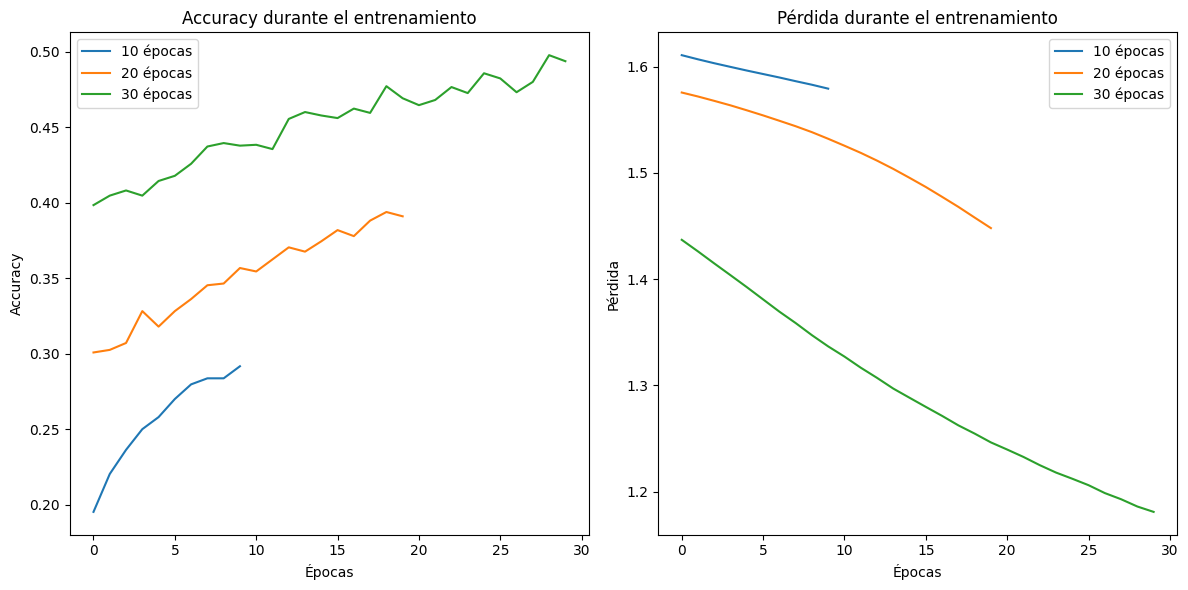

In [ ]:
# Preprocesamiento: eliminar la columna 'Player'
nba_stats = data.drop(columns=['Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(f"Clases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]

# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

# Aplicar OneHotEncoder a la columna categórica 'Tm' usando pd.get_dummies
X = pd.get_dummies(X, columns=['Tm'])

# Codificar las etiquetas de la variable objetivo
y = pd.factorize(y)[0]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Normalizar las características (excepto las columnas one-hot encoded)
for col in X_train.columns:
    if 'Tm_' not in col:  # No normalizar las columnas one-hot encoded
        max_value = X_train[col].max()
        if max_value != 0:
            X_train[col] = X_train[col] / max_value
            X_test[col] = X_test[col] / max_value

# Asegurarnos de que no haya valores NaN en los datos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convertir los datos a tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Número de clases
num_c = np.unique(y).shape[0]

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_c)

# Definir la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),  # Capa de entrada (aplanado)
    tf.keras.layers.Dense(256, activation=tf.nn.relu),  # Primera capa oculta (256 neuronas)
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  # Segunda capa oculta (128 neuronas)
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # Tercera capa oculta (64 neuronas)
    tf.keras.layers.Dense(num_c, activation='softmax')  # Capa de salida con 'num_c' neuronas y activación softmax
])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Lista para almacenar los resultados
epochs_results = []

# Entrenar y evaluar el modelo para 10, 20 y 30 épocas
for epochs in [10, 20, 30]:
    print(f"Entrenando el modelo con {epochs} épocas...")

    # Entrenar el modelo
    history = model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=64, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    probs = model.predict(X_test)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)

    # Almacenar los resultados para este número de épocas
    epochs_results.append({
        'epochs': epochs,
        'accuracy': accuracy,
        'history': history.history  # Almacenar la historia de entrenamiento
    })

# Imprimir los resultados de todas las épocas al final
print("\nResultados finales de todas las épocas:")
for result in epochs_results:
    print(f"\nEpocas: {result['epochs']}")
    print(f"Accuracy en el conjunto de prueba: {result['accuracy']:.4f}")
    print(f"Historia de precisión durante el entrenamiento: {result['history']['accuracy']}")
    print(f"Historia de pérdida durante el entrenamiento: {result['history']['loss']}")

plt.figure(figsize=(12, 6))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
for result in epochs_results:
    plt.plot(result['history']['accuracy'], label=f'{result["epochs"]} épocas')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
for result in epochs_results:
    plt.plot(result['history']['loss'], label=f'{result["epochs"]} épocas')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


**Deep Learning con 6 capas**


Clases a eliminar por tener menos de 10 ejemplos: ['SF-SG', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG', 'C-PF', 'SF-PF', 'PF-C']
Entrenando el modelo con 10 épocas...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2032 - loss: 1.6094
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2254 - loss: 1.6075
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2466 - loss: 1.6068
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2477 - loss: 1.6051
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2264 - loss: 1.6048
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2277 - loss: 1.6033
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2269 - loss: 1.6037
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2418 - loss: 1.6020
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2314 - loss: 1.6013
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2378 - loss: 1.6004
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entrenando el modelo con 20 épocas...
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2182 - loss: 1.6021
Epoch 2/2

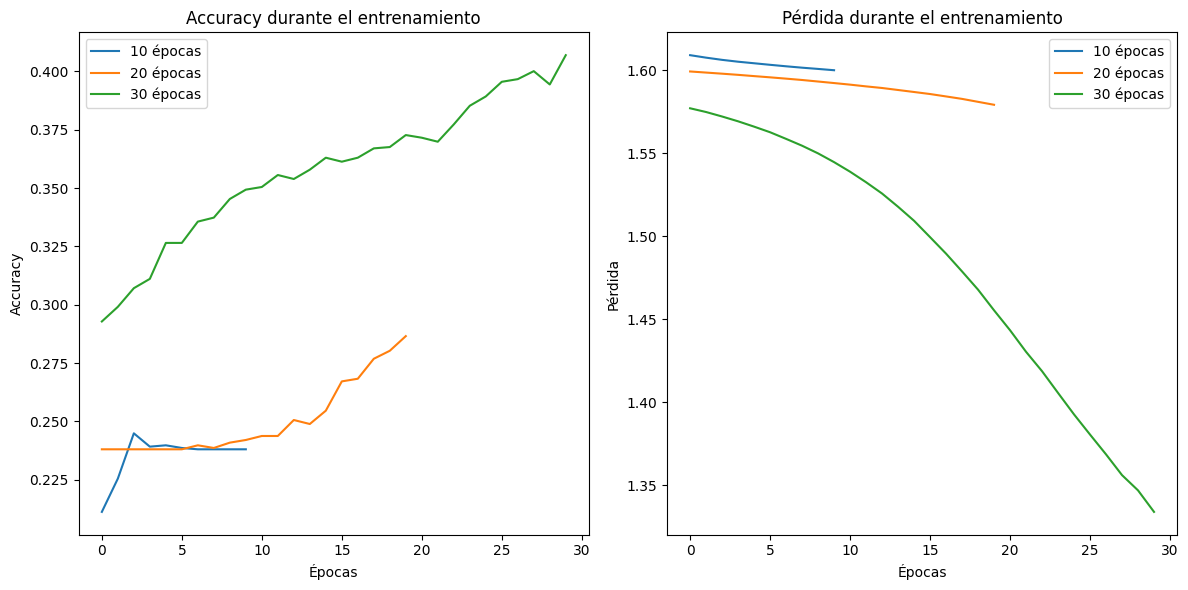

In [ ]:
# Preprocesamiento: eliminar la columna 'Player'
nba_stats = data.drop(columns=['Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(f"Clases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]

# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

# Aplicar OneHotEncoder a la columna categórica 'Tm' usando pd.get_dummies
X = pd.get_dummies(X, columns=['Tm'])

# Codificar las etiquetas de la variable objetivo
y = pd.factorize(y)[0]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Normalizar las características (excepto las columnas one-hot encoded)
for col in X_train.columns:
    if 'Tm_' not in col:  # No normalizar las columnas one-hot encoded
        max_value = X_train[col].max()
        if max_value != 0:
            X_train[col] = X_train[col] / max_value
            X_test[col] = X_test[col] / max_value

# Asegurarnos de que no haya valores NaN en los datos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convertir los datos a tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Número de clases
num_c = np.unique(y).shape[0]

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_c)

# Definir la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_c, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Lista para almacenar los resultados
epochs_results = []

# Entrenar y evaluar el modelo para 10, 20 y 30 épocas
for epochs in [10, 20, 30]:
    print(f"Entrenando el modelo con {epochs} épocas...")

    # Entrenar el modelo
    history = model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=64, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    probs = model.predict(X_test)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)

    # Almacenar los resultados para este número de épocas
    epochs_results.append({
        'epochs': epochs,
        'accuracy': accuracy,
        'history': history.history  # Almacenar la historia de entrenamiento
    })

# Imprimir los resultados de todas las épocas al final
print("\nResultados finales de todas las épocas:")
for result in epochs_results:
    print(f"\nEpocas: {result['epochs']}")
    print(f"Accuracy en el conjunto de prueba: {result['accuracy']:.4f}")
    print(f"Historia de precisión durante el entrenamiento: {result['history']['accuracy']}")
    print(f"Historia de pérdida durante el entrenamiento: {result['history']['loss']}")

plt.figure(figsize=(12, 6))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
for result in epochs_results:
    plt.plot(result['history']['accuracy'], label=f'{result["epochs"]} épocas')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
for result in epochs_results:
    plt.plot(result['history']['loss'], label=f'{result["epochs"]} épocas')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


**Deep Learning con 10 capas**


Clases a eliminar por tener menos de 10 ejemplos: ['SF-SG', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG', 'C-PF', 'SF-PF', 'PF-C']
Entrenando el modelo con 10 épocas...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2357 - loss: 1.6092
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2444 - loss: 1.6079
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2342 - loss: 1.6077
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2378 - loss: 1.6071
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2453 - loss: 1.6057
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2375 - loss: 1.6063
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2370 - loss: 1.6055
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2453 - loss: 1.6043
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2562 - loss: 1.6031
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2388 - loss: 1.6047
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Entrenando el modelo con 20 épocas...
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2560 - loss: 1

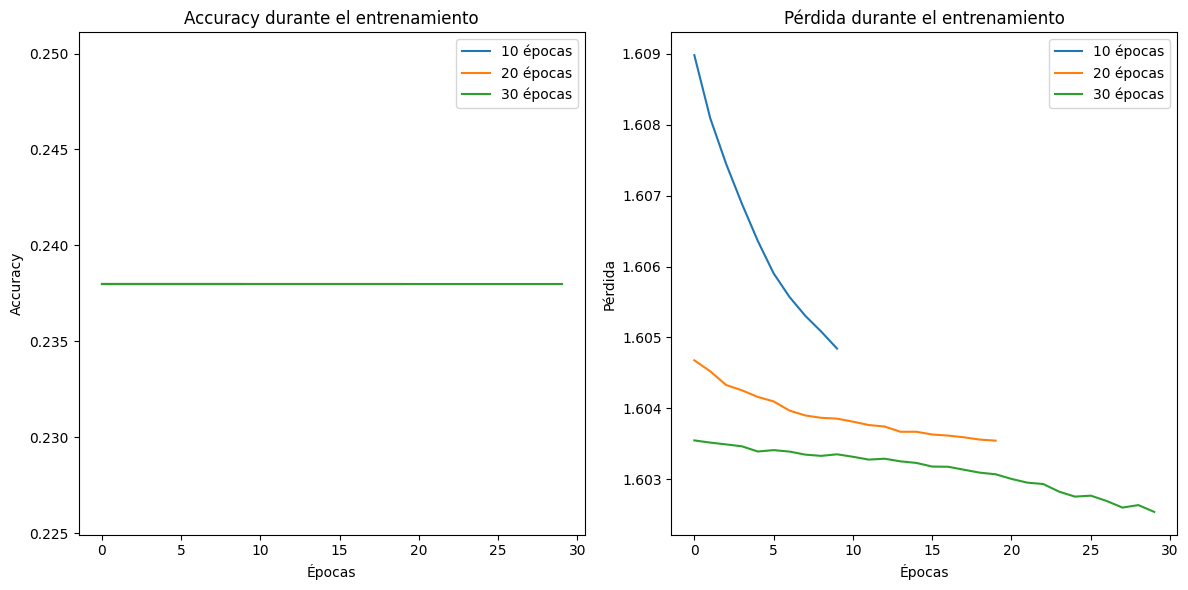

In [ ]:
# Preprocesamiento: eliminar la columna 'Player'
nba_stats = data.drop(columns=['Player'])

# Contar el número de ejemplos por clase
class_counts = nba_stats['Pos'].value_counts()

# Definir un umbral para eliminar clases con pocos ejemplos
threshold = 10  # Puedes ajustar este valor según sea necesario

# Eliminar las clases con pocos ejemplos
to_remove = class_counts[class_counts < threshold].index
print(f"Clases a eliminar por tener menos de {threshold} ejemplos: {to_remove.tolist()}")
nba_stats = nba_stats[~nba_stats['Pos'].isin(to_remove)]

# Definir las características (X) y la variable objetivo (y)
X = nba_stats.drop(columns=['Pos'])
y = nba_stats['Pos']

# Aplicar OneHotEncoder a la columna categórica 'Tm' usando pd.get_dummies
X = pd.get_dummies(X, columns=['Tm'])

# Codificar las etiquetas de la variable objetivo
y = pd.factorize(y)[0]

# Dividir el dataset en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Normalizar las características (excepto las columnas one-hot encoded)
for col in X_train.columns:
    if 'Tm_' not in col:  # No normalizar las columnas one-hot encoded
        max_value = X_train[col].max()
        if max_value != 0:
            X_train[col] = X_train[col] / max_value
            X_test[col] = X_test[col] / max_value

# Asegurarnos de que no haya valores NaN en los datos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Convertir los datos a tipo float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Número de clases
num_c = np.unique(y).shape[0]

# One-hot encoding de las etiquetas
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=num_c)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=num_c)

# Definir la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),  # Capa de entrada (aplanado)
    tf.keras.layers.Dense(512, activation=tf.nn.relu),  # Primera capa oculta (512 neuronas)
    tf.keras.layers.Dense(256, activation=tf.nn.relu),  # Segunda capa oculta (256 neuronas)
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  # Tercera capa oculta (128 neuronas)
    tf.keras.layers.Dense(64, activation=tf.nn.relu),   # Cuarta capa oculta (64 neuronas)
    tf.keras.layers.Dense(32, activation=tf.nn.relu),   # Quinta capa oculta (32 neuronas)
    tf.keras.layers.Dense(16, activation=tf.nn.relu),   # Sexta capa oculta (16 neuronas)
    tf.keras.layers.Dense(8, activation=tf.nn.relu),    # Séptima capa oculta (8 neuronas)
    tf.keras.layers.Dense(8, activation=tf.nn.relu),    # Octava capa oculta (8 neuronas)
    tf.keras.layers.Dense(16, activation=tf.nn.relu),   # Novena capa oculta (16 neuronas)
    tf.keras.layers.Dense(32, activation=tf.nn.relu),   # Décima capa oculta (32 neuronas)
    tf.keras.layers.Dense(num_c, activation='softmax')  # Capa de salida
])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Lista para almacenar los resultados
epochs_results = []

# Entrenar y evaluar el modelo para 10, 20 y 30 épocas
for epochs in [10, 20, 30]:
    print(f"Entrenando el modelo con {epochs} épocas...")

    # Entrenar el modelo
    history = model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=64, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    probs = model.predict(X_test)
    preds = np.argmax(probs, axis=1)
    accuracy = accuracy_score(np.argmax(y_test_ohe, axis=1), preds)

    # Almacenar los resultados para este número de épocas
    epochs_results.append({
        'epochs': epochs,
        'accuracy': accuracy,
        'history': history.history  # Almacenar la historia de entrenamiento
    })

# Imprimir los resultados de todas las épocas al final
print("\nResultados finales de todas las épocas:")
for result in epochs_results:
    print(f"\nEpocas: {result['epochs']}")
    print(f"Accuracy en el conjunto de prueba: {result['accuracy']:.4f}")
    print(f"Historia de precisión durante el entrenamiento: {result['history']['accuracy']}")
    print(f"Historia de pérdida durante el entrenamiento: {result['history']['loss']}")


plt.figure(figsize=(12, 6))

# Gráfico de accuracy
plt.subplot(1, 2, 1)
for result in epochs_results:
    plt.plot(result['history']['accuracy'], label=f'{result["epochs"]} épocas')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
for result in epochs_results:
    plt.plot(result['history']['loss'], label=f'{result["epochs"]} épocas')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


**EJEMPLO DE USO: CLASIFICADOR DE POSICION**

In [ ]:
import numpy as np
import pandas as pd

# Supongamos que 'new_data' es el nuevo conjunto de datos (nuevo jugador) que queremos clasificar
new_data = pd.DataFrame({
    'Age': [39],
    'Height': [6.7],
    'PTS': [23],
    'AST': [9.1],
    'TRB': [8],
})


# Asegurarse de que las columnas coinciden con las del modelo (llenar las columnas faltantes con 0)
missing_cols = set(X_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[X_train.columns]  # Asegurarse de que el orden de las columnas es el mismo

# Convertir los datos a tipo float32
new_data = new_data.astype(np.float32)

# Hacer la predicción utilizando el modelo
pred_probs = model.predict(new_data)  # Predicción de probabilidades para cada clase
pred_class = np.argmax(pred_probs, axis=1)  # Obtener la clase con la mayor probabilidad

# Convertir el índice de la clase predicha de vuelta a la etiqueta de posición
position_labels = np.unique(y)  # Las etiquetas de las posiciones ('PG', 'SG', etc.)
predicted_position = position_labels[pred_class][0]

print(f"La posición predicha para el jugador es: {predicted_position}")

position_labels = np.unique(y)  # Las etiquetas de las posiciones ('PG', 'SG', etc.)
predicted_position = position_labels[pred_class][0]  # Obtiene la etiqueta correspondiente
print("Posiciones posibles:", position_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
La posición predicha para el jugador es: 2
Posiciones posibles: [0 1 2 3 4]


* PG (Point Guard) → 0

* SG (Shooting Guard) → 1

* SF (Small Forward) → 2

* PF (Power Forward) → 3

* C (Center) → 4

* PG (Point Guard):
También conocido como "base", es el jugador encargado de dirigir el juego. Su tarea principal es organizar las jugadas y asistir a sus compañeros. Suele ser un buen pasador y tiene habilidades de control de balón. Es el "líder" en la cancha.

* SG (Shooting Guard):
Conocido como "escolta", este jugador generalmente se encarga de anotar puntos, especialmente desde el perímetro (lanzamientos de 3 puntos). Es un buen tirador y también suele ser un defensor sólido.

* SF (Small Forward):
Se le llama "alero" y es un jugador versátil. Generalmente tiene habilidades para atacar tanto cerca del aro como desde la distancia. Suele ser el jugador que se adapta a diversas situaciones en el campo, ayudando tanto en ofensiva como en defensa.

* PF (Power Forward):
También conocido como "ala-pívot", juega cerca del aro, tanto en ofensiva como en defensa. Este jugador combina habilidades físicas y técnicas para luchar en el poste bajo, pero también puede tener un tiro de media distancia. Es más fuerte físicamente que el alero y suele ser uno de los pilares en los rebotes.

* C (Center):
El "pívot" es el jugador que juega en la posición más cercana al aro, y su función principal es defender, bloquear tiros, y atrapar rebotes. Es el jugador más alto y fuerte del equipo y a menudo es el encargado de anotar en el poste bajo o capturar los rebotes ofensivos y defensivos.

**EJEMPLO 2: DEFINICION DEL PROBLEMA**

Seleccionar una alineación ideal de 5 jugadores (PG, SG, SF, PF, C) basada en las siguientes estadísticas clave del dataset:

* ***Estadísticas ofensivas:*** Puntos por partido (PTS), asistencias (AST).
* ***Estadísticas defensivas:*** Rebotes totales (TRB), robos (STL), bloqueos (BLK).
* ***Eficiencia general:*** EFG% (eficiencia en tiros de campo).
* ***Restricción de posición:*** Solo puede haber un jugador de cada posición (Pos = PG, SG, SF, PF, C).
* ***Otras restricciones opcionales:*** Límite de minutos jugados promedio (MP), balance ofensivo/defensivo, y/o salario (si tienes esa información).


In [ ]:
pip install numpy pandas tensorflow scikit-learn deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
import random

In [ ]:
#@title **Cargar y preparar datos**

# Cargar los datos
NBAStats_1 = pd.read_csv('2021-2022 NBA Player Stats.csv', sep=";", encoding='latin-1')
NBAStats_2 = pd.read_csv('2022-2023 NBA Player Stats.csv', sep=";", encoding='latin-1')
NBAStats_3 = pd.read_csv('2023-2024 NBA Player Stats.csv', sep=";", encoding='latin-1')

data = pd.concat([NBAStats_1, NBAStats_2, NBAStats_3], ignore_index=True)
data = data[['Player', 'Pos', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'eFG%']]

# Limpiar posiciones (algunos jugadores tienen múltiples posiciones separadas por "-")
data['Pos'] = data['Pos'].apply(lambda x: x.split("-")[0])
print(data['Pos'].value_counts())
print()
print()
print()
print()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

positions = ["PG", "SG", "SF", "PF", "C"]
def generate_team():
    team = []
    for pos in positions:
        available_players = data[data["Pos"] == pos].index.tolist()
        player = random.choice(available_players)
        team.append(player)
    return team

toolbox = base.Toolbox()
toolbox.register("gene", random.randint, 0, len(data) - 1)
toolbox.register("individual", tools.initIterate, creator.Individual, generate_team)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

population = toolbox.population(n=50)

def calculate_fitness(individual, data):
    stats = data.iloc[individual]

    normalized_stats = stats[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'eFG%']].apply(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )

    weights = [0.4, 0.2, 0.2, 0.1, 0.05, 0.05]
    fitness = (normalized_stats.values * weights).sum(axis=1).sum()

    if not valid_positions(individual, data):
        fitness -= 1000

    return fitness

def valid_positions(individual, data):
    positions = data.iloc[individual]['Pos']
    return len(positions.unique()) == 5

toolbox.register("evaluate", calculate_fitness, data=data)
toolbox.register("select", tools.selTournament, tournsize=3)

def crossover(parent1, parent2):
    child1, child2 = creator.Individual(parent1[:]), creator.Individual(parent2[:])
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2

toolbox.register("mate", crossover)

def mutate(individual):
    if len(individual) > 0:
        i = random.randint(0, len(individual) - 1)
        individual[i] = random.randint(0, len(data) - 1)
    return individual,

toolbox.register("mutate", mutate)

generations = 10
for gen in range(generations):

    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
    invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
    fits = map(toolbox.evaluate, invalid_individuals)

    for ind, fit in zip(invalid_individuals, fits):
        ind.fitness.values = (fit,)

    population = toolbox.select(offspring, k=len(population))

print()
print()
# Mostrar la alineación óptima y sus estadísticas
best = tools.selBest(population, k=1)[0]
best_team = data.iloc[best]
print(" Mejor Alineacion:\n", best_team)
print()
print()
# Fitness de la mejor alineación
best_fitness = calculate_fitness(best, data)
print("Fitness de la mejor alineación:\n", best_fitness)
print()
print()
print()
print()


Pos
SG    532
SF    447
PG    442
PF    422
C     383
Name: count, dtype: int64






/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "




 Mejor Alineacion:
                  Player Pos   PTS  AST  TRB  STL  BLK   eFG%
615   Immanuel Quickley  PG  11.3  3.5  3.2  0.7  0.0  0.487
1029        Eric Gordon  SG  11.0  2.1  1.7  0.6  0.4  0.597
1587      Dillon Brooks  SF  12.7  1.7  3.4  0.9  0.1  0.515
1470   Kenrich Williams  PF   8.0  2.0  4.9  0.8  0.3  0.590
235        Enes Freedom   C   3.7  0.2  4.6  0.1  0.4  0.536


Fitness de la mejor alineación:
 2.9565530303030303




